In [44]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import mplhep as hep
import math
import scipy
from scipy.signal import peak_widths

genkt = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_z_xsec_qq_genkt.root")
kt = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_z_xsec_qq_kt.root")
valencia = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_z_xsec_qq_valencia.root")
mumu = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_z_xsec_mumu.root")
ee = uproot.open("/home/submit/marinamn/fccee/FCCAnalyzer/tmp/output_z_xsec_ee.root")

                       ┌─────────────────────────────────────────────────────┐
[-inf,   0) 0          │                                                     │
[   0,   1) 0          │                                                     │
[   1,   2) 0          │                                                     │
[   2,   3) 0          │                                                     │
[   3,   4) 0          │                                                     │
[   4,   5) 30271707   │                                                     │
[   5,   6) 32387646   │                                                     │
[   6,   7) 81761160   │                                                     │
[   7,   8) 197213484  │                                                     │
[   8,   9) 458795646  │▏                                                    │
[   9,  10) 736512351  │▏                                                    │
[  10,  11) 1285592076 │▎                           

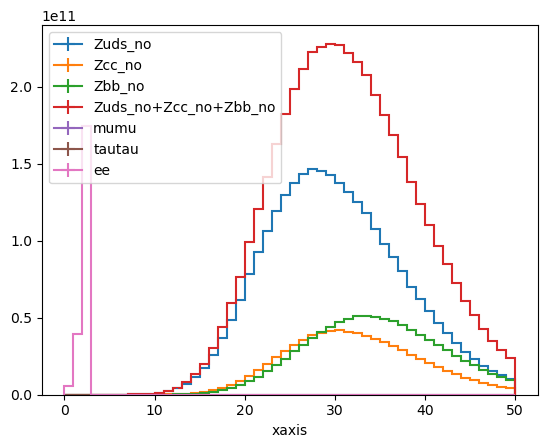

In [53]:
Zuds_no = genkt['p8_ee_Zuds_ecm91/RP_no;1'].to_hist()
Zcc_no = genkt['p8_ee_Zcc_ecm91/RP_no;1'].to_hist()
Zbb_no = genkt['p8_ee_Zbb_ecm91/RP_no;1'].to_hist()
mumu_no = mumu['p8_ee_Zmumu_ecm91/leps_all_no_cut0;1'].to_hist()
tautau_no = mumu['p8_ee_Ztautau_ecm91/leps_all_no_cut0;1'].to_hist()
ee_no = ee['p8_ee_Zee_ecm91/leps_all_no_cut0;1'].to_hist()

hep.histplot([Zuds_no,Zcc_no,Zbb_no,Zuds_no+Zcc_no+Zbb_no,mumu_no,tautau_no,ee_no], 
             label = ["Zuds_no","Zcc_no","Zbb_no","Zuds_no+Zcc_no+Zbb_no","mumu","tautau","ee"])
plt.legend()
print(Zuds_no+Zcc_no+Zbb_no)

In [46]:
# #
# def norm_sum_e(hist):
#     y,x = hist.to_numpy()
#     xnew = hist.axes[0].centers/91.118
#     maximum = max(y)
#     index = np.argmax(y)
#     peak = xnew[index]
#     print("Maximum = ",maximum)
#     print("Peak = ", peak)
#     half_max = maximum/2
#     sides_index = np.argwhere(abs(y - half_max) < 250000000)
#     sides = xnew[sides_index]
#     print(sides_index, sides)
#     jer = sides[2] - sides[0]
#     print("JER = ",jer)
#     plt.stairs(y[:-1],xnew)
#     return (peak,jer)

In [47]:

# hep.histplot([Zuds_e,Zcc_e,Zbb_e,Zqq_e,Zqq2_e], label = ["Zuds_e","Zcc_e","Zbb_e","Zqq_e","Zqq2_e"])
# plt.yscale("log")
# plt.legend()

In [48]:
# y,x = Zqq_e.to_numpy()
# xnew = Zqq_e.axes[0].centers/91.118
# maximum = max(y)
# index = np.argmax(y)
# peak = xnew[index]
# #print("Maximum = ",maximum)
# print("Peak = ", peak)
# half_max = maximum/2
# sides_index = np.argwhere(abs(y - half_max) < 700000000)
# sides = xnew[sides_index]
# #print(sides_index, sides)
# jer = sides[1][0] - sides[0][0]
# print("JER = ",jer)


# genkt_e = genkt['p8_ee_Zcc_ecm91/sum_e;1'].to_hist()
# ye,xe = genkt_e.to_numpy()
# xneww = genkt_e.axes[0].centers/91.118


# genkt_e3 = genkt['p8_ee_Zbb_ecm91/sum_e;1'].to_hist()
# ye3,xe3 = genkt_e3.to_numpy()
# xneww3 = genkt_e3.axes[0].centers/91.118

# genkt_e4 = genkt['p8_ee_Zuds_ecm91/sum_e;1'].to_hist()
# ye4,xe4 = genkt_e4.to_numpy()
# xneww4 = genkt_e4.axes[0].centers/91.118

# #plt.plot(x[:-1],(ye+ye3+ye4)/y)
# #plt.plot(x[:-1],y)
# hep.histplot([Zqq_e,genkt_e+genkt_e3+genkt_e4])
# plt.yscale("log")

(91.0, 102.0)

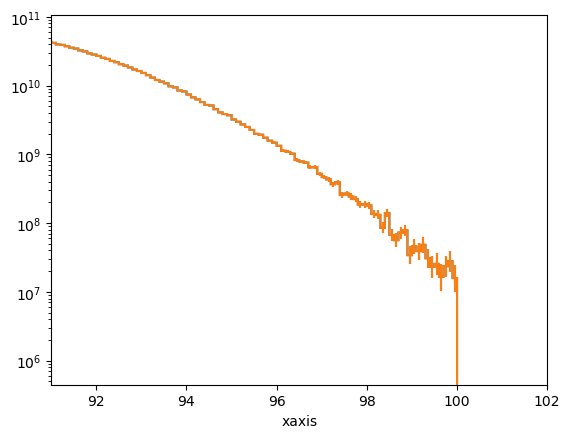

In [56]:
Zuds_e = genkt['p8_ee_Zuds_ecm91/sum_energy;1'].to_hist()
Zcc_e = genkt['p8_ee_Zcc_ecm91/sum_energy;1'].to_hist()
Zbb_e = genkt['p8_ee_Zbb_ecm91/sum_energy;1'].to_hist()
Zqq2_e = genkt['wzp6_ee_qq_ecm91p2/sum_energy'].to_hist()
Zqq_e = Zuds_e+Zcc_e+Zbb_e

genkt_e = genkt['p8_ee_Zcc_ecm91/sum_e;1'].to_hist()
genkt_e3 = genkt['p8_ee_Zbb_ecm91/sum_e;1'].to_hist()
genkt_e4 = genkt['p8_ee_Zuds_ecm91/sum_e;1'].to_hist()
Zqq2_jets = genkt['wzp6_ee_qq_ecm91p2/sum_e'].to_hist()
Zqq_jets = genkt_e+genkt_e3+genkt_e4

hep.histplot([Zqq_e, Zqq_jets])
plt.yscale("log")
plt.xlim(91,102)

In [26]:
def mean(x,y):
    numerator = 0
    denominator = sum(y)
    for i in range(0,len(x)):
        numerator += x[i]*y[i]
        mean = numerator/denominator
    return mean

def std(x,y):
    num = 0
    denominator = sum(y)
    for i in range(0,len(x)):
        num += (x[i]-mean(x,y))**2
        std = np.sqrt(num/(denominator-1))
    return std

print("JER = ", mean(xnew,y))
print("Standard Deviation = ", std(xnew,y))

JER =  0.9479217806262494
Standard Deviation =  7.53839962799892e-06
